<a href="https://colab.research.google.com/github/josiahtr/MISY262-Team-3-Final-Project/blob/main/MISY262_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Some sources:**
Linear regression outline: https://www.kaggle.com/sudhirnl7/linear-regression-tutorial <br>
Changing working directory to gdrive folder: https://newbedev.com/google-colab-changing-directory <br>
Missing vals visualization: https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/


In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/drive/My\ Drive/

[Errno 2] No such file or directory: '/content/drive/My Drive/'
/content


In [4]:
!pwd

/content


In [5]:
#importing the os module
import os
os.chdir('/content/gdrive/MyDrive/MISY262')

In [6]:
!pwd

/content/gdrive/MyDrive/MISY262


In [7]:
# Import dataset
#path ='dataset/'
df = pd.read_csv('rideshare_kaggle.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (693071, 57)



,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [8]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [9]:
#names of columns
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [10]:
#info on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [11]:
#number of rows
len(df)

693071

In [12]:
#some basic stats for each of the columns
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [13]:
#Checking for missing values
df.isnull()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
693067,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
693068,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
693069,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

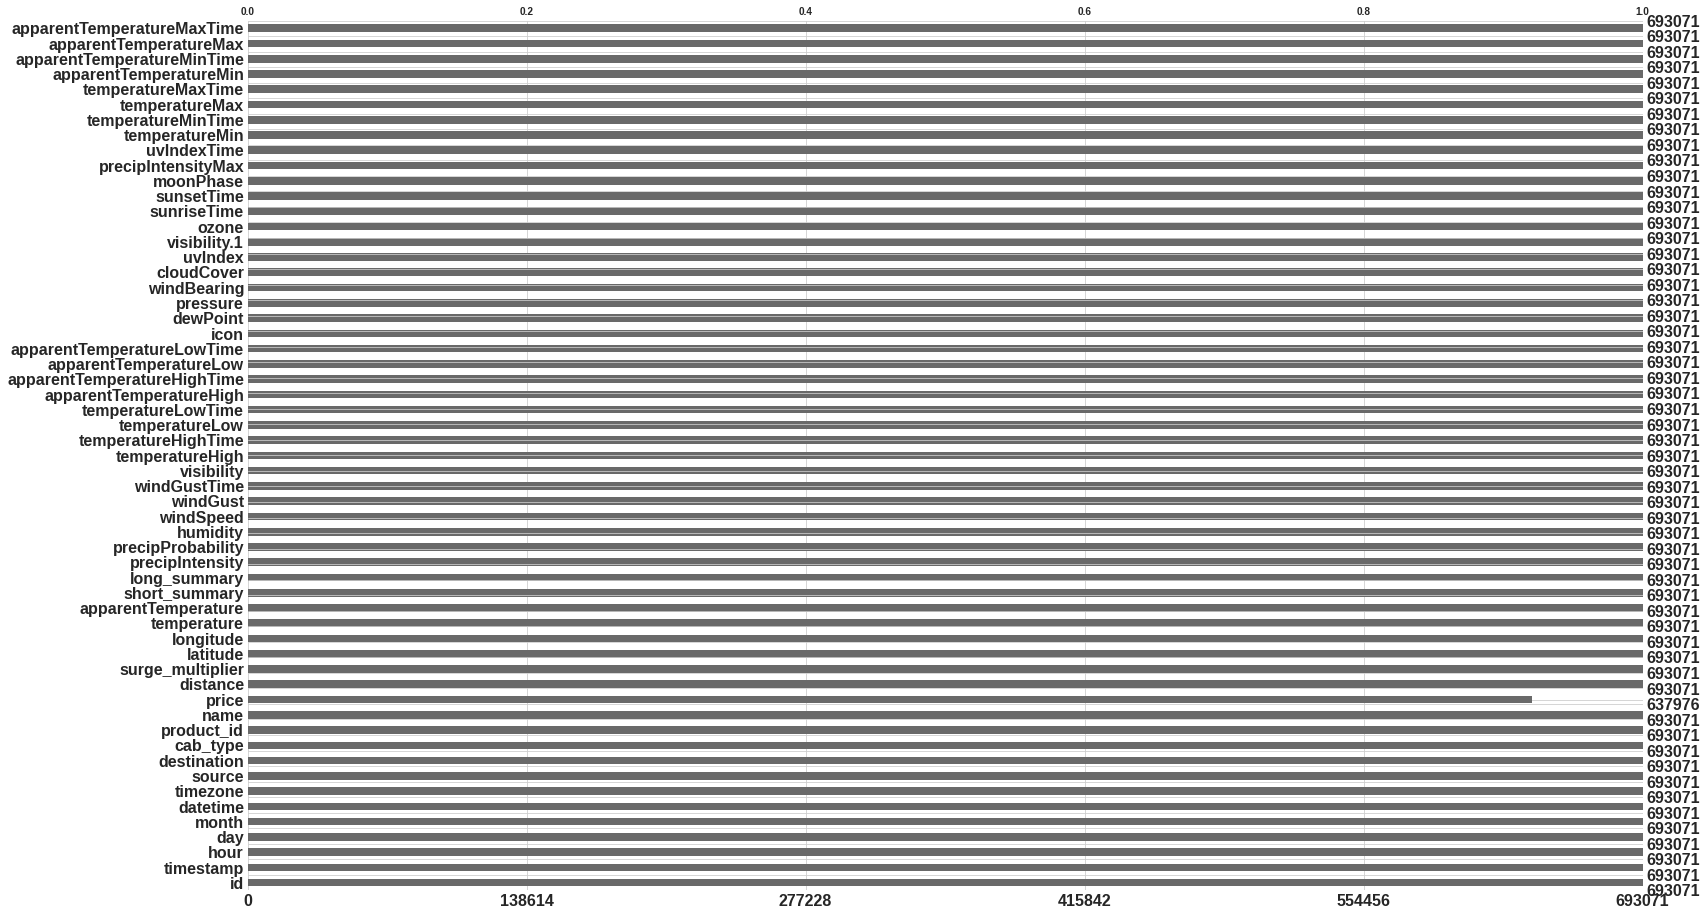

In [14]:
# Program to visualize missing values in dataset
  
# Importing the libraries
import pandas as pd
import missingno as msno
  
# Visualize the number of missing
# values as a bar chart
msno.bar(df)
#From this chart, we can see that, primarily, the number of missing values comes from the 'price' feature

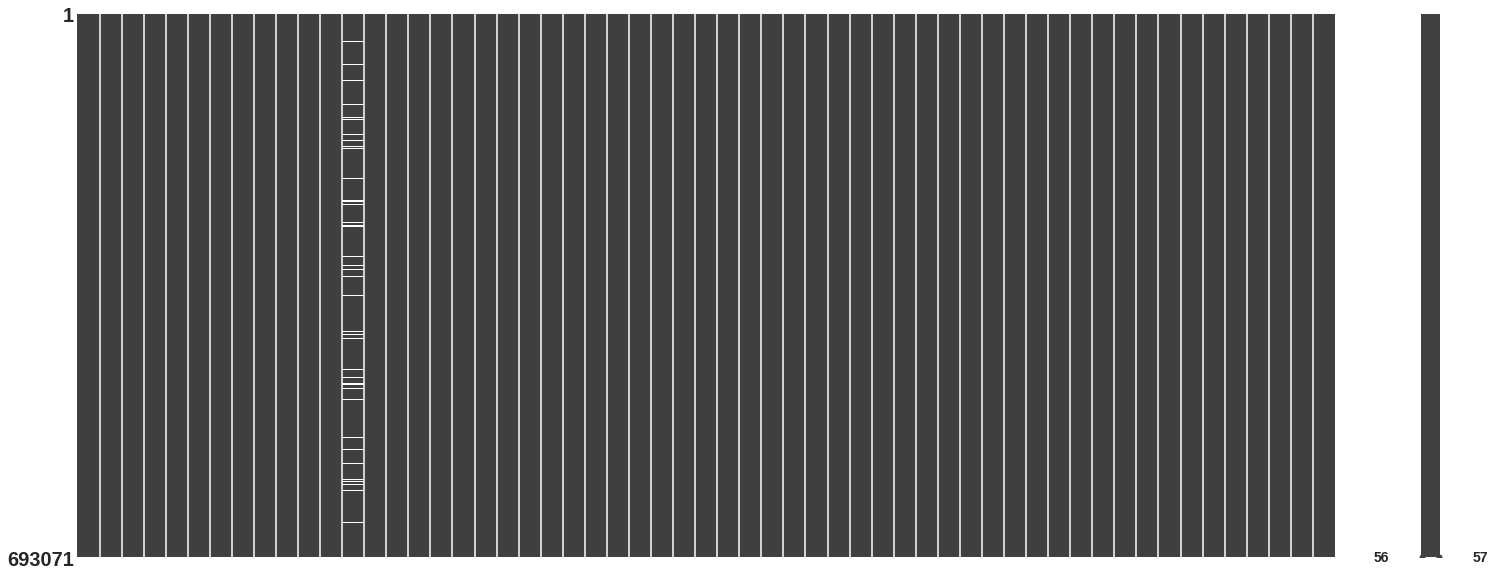

In [15]:
#Visualizing missing values as matrix
msno.matrix(df)
#Sidenote, I'm not exactly sure how to read this.

In [16]:
#Wow, that's a lot of missing values in price. Let's get the exact number.
df['price'].isna().sum()

55095

In [17]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

**Further exploration:** is there any correllation with these missing price values and other features? (Like do Uber Taxis for example just not provide price easily) How could we check for that? <br>
<br>
Also, we'll have to find a way to statistically drop these values before we get into the linear regression <br>
<br>
**Project questions:** Will we need to do any sort of filtering? Like would it be best to create two linear regression models, one for Lyft and one for Uber, and compare? Or be best to create one model that can accurately predict when and where to get the best price across the two? <br>
<br>
Could surge rate be something to look into especially? Could be something to research - is this something independently based on one system factor such as volume, or is it a product of numorous factors such as time, location, weather, etc, that influences price hand-in-hand? <br> - Josiah